



## Assignment number : 3
## Name : Varun Vashishtha
## Roll number : 2022201061

In [3]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 4.0 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Understanding YOLO object detector. Study the YOLO object detector in detail. Understand and explain (in your own words, no plagiarism!) how single-shot detectors such as YOLO are different from the R-CNN series that we learned in class. There are more than 8 versions of the YOLO series. Pick any 3 and understand and explain (in your words) the differences between them.

### Understanding YOLO object detector

YOLO, or You Only Look Once, operates akin to a rapid detective. It takes in the entire image at once, swiftly predicting object locations and classes. By dividing the image into a grid, YOLO directly predicts bounding boxes and class probabilities from each grid cell. This approach ensures speed, as YOLO requires only a single pass through the image for predictions.

On the other hand, the R-CNN series, or Region-based Convolutional Neural Networks, meticulously inspects different regions of the image sequentially to detect objects. It starts by generating numerous potential object regions (known as region proposals), then proceeds to classify and refine these regions. However, R-CNN processes each region individually, which can lead to slower performance due to the need to examine many regions separately.

#### Three different versions of YOLO

The three versions of the YOLO series where significant innovations occurred are:

YOLOv2 (YOLO9000): YOLOv2 introduced several innovations, including the use of anchor boxes for better bounding box predictions, the incorporation of a feature pyramid network (FPN) for multi-scale feature extraction, and the introduction of dimension clusters and joint training to improve detection across a wide range of object sizes. These innovations significantly improved the model's accuracy and ability to detect a larger number of object categories.

YOLOv3: YOLOv3 continued the trend of innovation by introducing Darknet-53, a deeper backbone network compared to previous versions, for more effective feature extraction. It also implemented multi-scale training and detection, allowing the model to detect objects at different scales more effectively. These innovations further improved the model's accuracy and speed compared to YOLOv2.

YOLOv4: YOLOv4 represented a significant leap forward in terms of performance and innovation. It introduced a series of improvements, including the use of the CSPDarknet53 backbone for better feature extraction, the introduction of PANet for feature aggregation across different scales, and the implementation of various optimization techniques such as Mish activation function, CIOU loss, and Mosaic data augmentation. YOLOv4 achieved state-of-the-art performance in terms of accuracy and speed, further solidifying YOLO's position as a leading object detection framework.






### Hands on with ultralytics. Familiarize yourself with the ultralytics library (https://docs. ultralytics.com/). Learn more about the train and predict functions of the YOLO class.

#### (i) Create a yolov8n (yolo-v8-nano) model from scratch. How many parameters does this model have? How many convolutional layers does it use?

#### (ii) Compare the size (# parameters and # conv layers) of this model against yolov8m (medium) model.
Hint: See https://docs.ultralytics.com/models/yolov8/.

In [5]:
from ultralytics import YOLO
import torch.nn as nn
from matplotlib import pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np
import os
from IPython.display import Image

#### YOLO v8 scratch

In [6]:
yolo_nano_model_1 = YOLO('yolov8n.yaml')

total_params = sum(param.numel() for param in yolo_nano_model_1.parameters())
print(f"The YOLOv8-nano model has {total_params:,} parameters.")

conv_layers = sum(isinstance(module, nn.Conv2d) for module in yolo_nano_model_1.modules())
print(f"The YOLOv8-nano model has {conv_layers} convolutional layers.")

The YOLOv8-nano model has 3,157,200 parameters.
The YOLOv8-nano model has 64 convolutional layers.


In [5]:
yolo_medium_model_1 = YOLO('yolov8m.yaml')

total_params = sum(param.numel() for param in yolo_medium_model_1.parameters())
print(f"The YOLOv8-medium model has {total_params:,} parameters.")

conv_layers = sum(isinstance(module, nn.Conv2d) for module in yolo_medium_model_1.modules())
print(f"The YOLOv8-medium model has {conv_layers} convolutional layers.")

The YOLOv8-medium model has 25,902,640 parameters.
The YOLOv8-medium model has 84 convolutional layers.


In [6]:
yolo_nano_model_2 = YOLO('yolov8n.yaml')
yolo_medium_model_2 = YOLO('yolov8m.yaml')

#### Yolov8n pretrained

In [7]:
yolo_nano_model_pretrain_1 = YOLO('yolov8n.pt')
yolo_nano_model_pretrain_2 = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 183MB/s]


#### YOLO8m pretrained

In [8]:
# yolo_medium_model_pretrain_1 = YOLO('yolov8m.yaml')
yolo_medium_model_pretrain_1 = YOLO('yolov8m.pt')

# yolo_medium_model_pretrain_2 = YOLO('yolov8m.yaml')
yolo_medium_model_pretrain_2 = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 218MB/s]




```
# This is formatted as code
```

#### Train1 and train2 dataset

###Data preparation. Download a sample of the Open Images Dataset v7, specially catering to ducks https://www.kaggle.com/datasets/haziqasajid5122/yolov8-finetuning-dataset-ducks. We will use this to fine-tune a Yolo v8 nano detector. Unzip the archive and note how the data is stored separately in the training and validation sets.

In [7]:
!pip install kaggle -q

import json
import os

kaggle_credentials = {
    "username": "anonymous97531",
    "key": "122302344391d5179696163abd020aec"
}

# Create the .kaggle directory if it doesn't exist
!mkdir -p /root/.kaggle

# Write the credentials to a Kaggle configuration file
with open('/root/.kaggle/kaggle.json', 'w') as f:
    json.dump(kaggle_credentials, f)

# Set the permissions of the file
os.chmod('/root/.kaggle/kaggle.json', 600)

!kaggle datasets download -d haziqasajid5122/yolov8-finetuning-dataset-ducks

!mkdir -p dataset

!unzip -q yolov8-finetuning-dataset-ducks.zip -d dataset

!ls -l dataset


 98% 484M/492M [00:03<00:00, 164MB/s]
100% 492M/492M [00:03<00:00, 134MB/s]
total 12
-rw-r--r-- 1 root root   85 Jun 29  2023 config.yaml
drwxr-xr-x 4 root root 4096 Apr 12 15:12 images
drwxr-xr-x 4 root root 4096 Apr 12 15:12 labels


### Training YOLO variants.

### (i) Create two versions of the training dataset. train1 containing 100 images. train2 containing all 400 images.
### You may slice the dataset randomly. Create copies of the config.yaml that came with the dataset zip file accordingly (point to the right directories).

In [8]:
import os
import shutil
import random

dataset_dir = 'dataset'
train1_dir = os.path.join(dataset_dir, 'train1')
train2_dir = os.path.join(dataset_dir, 'train2')
images_dir = 'images'
labels_dir = 'labels'
config_file = 'config.yaml'

os.makedirs(train1_dir, exist_ok=True)
os.makedirs(train2_dir, exist_ok=True)

for folder in [train1_dir, train2_dir]:
    os.makedirs(os.path.join(folder, images_dir, 'train'), exist_ok=True)
    os.makedirs(os.path.join(folder, images_dir, 'val'), exist_ok=True)
    os.makedirs(os.path.join(folder, labels_dir, 'train'), exist_ok=True)
    os.makedirs(os.path.join(folder, labels_dir, 'val'), exist_ok=True)
    # shutil.copy(os.path.join(dataset_dir, images_dir, 'train', 'config.yaml'), os.path.join(folder, config_file))
    shutil.copy(os.path.join(dataset_dir, config_file), os.path.join(folder, config_file))

image_files = os.listdir(os.path.join(dataset_dir, images_dir, 'train'))
total_files = len(image_files)
train1_count = int(total_files * 0.25)
print("len(image_files)", train1_count, len(image_files))
indices = list(range(total_files))

random.shuffle(indices)

shuffled_files = [image_files[i].split('.')[0] for i in indices]

for i in range(train1_count):
    src_image = os.path.join(dataset_dir, images_dir, 'train', shuffled_files[i] + '.png')
    dst_image = os.path.join(train1_dir, images_dir, 'train', shuffled_files[i] + '.png')
    shutil.copy(src_image, dst_image)

    src_label = os.path.join(dataset_dir, labels_dir, 'train', shuffled_files[i] + '.txt')
    dst_label = os.path.join(train1_dir, labels_dir, 'train', shuffled_files[i] + '.txt')
    shutil.copy(src_label, dst_label)

for i in range(0, total_files):
    src_image = os.path.join(dataset_dir, images_dir, 'train', shuffled_files[i] + '.png')
    dst_image = os.path.join(train2_dir, images_dir, 'train', shuffled_files[i] + '.png')
    shutil.copy(src_image, dst_image)

    src_label = os.path.join(dataset_dir, labels_dir, 'train', shuffled_files[i] + '.txt')
    dst_label = os.path.join(train2_dir, labels_dir, 'train', shuffled_files[i] + '.txt')
    shutil.copy(src_label, dst_label)


image_files = os.listdir(os.path.join(dataset_dir, images_dir, 'val'))
total_files = len(image_files)
train1_count = int(total_files * 0.25)

indices = list(range(total_files))
random.shuffle(indices)

shuffled_files = [image_files[i].split('.')[0] for i in indices]
print("len(image_files)", train1_count, len(image_files))

for i in range(train1_count):
    src_image = os.path.join(dataset_dir, images_dir, 'val', shuffled_files[i] + '.png')
    dst_image = os.path.join(train1_dir, images_dir, 'val', shuffled_files[i] + '.png')
    shutil.copy(src_image, dst_image)

    src_label = os.path.join(dataset_dir, labels_dir, 'val', shuffled_files[i] + '.txt')
    dst_label = os.path.join(train1_dir, labels_dir, 'val', shuffled_files[i] + '.txt')
    shutil.copy(src_label, dst_label)

for i in range(0, total_files):
    src_image = os.path.join(dataset_dir, images_dir, 'val', shuffled_files[i] + '.png')
    dst_image = os.path.join(train2_dir, images_dir, 'val', shuffled_files[i] + '.png')
    shutil.copy(src_image, dst_image)

    src_label = os.path.join(dataset_dir, labels_dir, 'val', shuffled_files[i] + '.txt')
    dst_label = os.path.join(train2_dir, labels_dir, 'val', shuffled_files[i] + '.txt')
    shutil.copy(src_label, dst_label)



len(image_files) 100 400
len(image_files) 12 50


In [9]:
import os

def count_files_in_folder(folder_path):
    file_count = 0
    for root, dirs, files in os.walk(folder_path):
        file_count += len(files)
    return file_count

def create_folder_structure(folder_path):
    tree_structure = {}
    for root, dirs, files in os.walk(folder_path):
        folder_name = os.path.relpath(root, folder_path)
        if folder_name == '.':
            folder_name = os.path.basename(folder_path)
        tree_structure[folder_name] = len(files)
    return tree_structure

dataset_dir = 'dataset'

dataset_file_count = count_files_in_folder(dataset_dir)

tree_structure = create_folder_structure(dataset_dir)

def print_tree_structure(tree, indent=0):
    for key, value in tree.items():
        print('  ' * indent + '|-- ' + key + f' ({value} files)')
        if isinstance(tree[key], dict):
            print_tree_structure(tree[key], indent+1)

print(f"Total files in '{dataset_dir}': {dataset_file_count}")
print_tree_structure(tree_structure)


Total files in 'dataset': 2027
|-- dataset (1 files)
|-- images (0 files)
|-- images/train (400 files)
|-- images/val (50 files)
|-- labels (0 files)
|-- labels/train (400 files)
|-- labels/val (50 files)
|-- train2 (1 files)
|-- train2/images (0 files)
|-- train2/images/train (400 files)
|-- train2/images/val (50 files)
|-- train2/labels (0 files)
|-- train2/labels/train (400 files)
|-- train2/labels/val (50 files)
|-- train1 (1 files)
|-- train1/images (0 files)
|-- train1/images/train (100 files)
|-- train1/images/val (12 files)
|-- train1/labels (0 files)
|-- train1/labels/train (100 files)
|-- train1/labels/val (12 files)


In [10]:
import os

dataset_dir = 'dataset'
images_dir = os.path.join(dataset_dir, 'images')
labels_dir = os.path.join(dataset_dir, 'labels')

# Function to remove file extension
def remove_extension(filename):
    return os.path.splitext(filename)[0]

def find_unique_filenames(images_dir, labels_dir):
    # Get the list of file names in the images and labels folders
    images_files = set(map(remove_extension, os.listdir(images_dir)))
    labels_files = set(map(remove_extension, os.listdir(labels_dir)))

    # Find the file names that are unique to each folder
    unique_to_images = images_files - labels_files
    unique_to_labels = labels_files - images_files

    return unique_to_images, unique_to_labels

# Find and print unique file names for each pair of images and labels folders
for folder_name in os.listdir(images_dir):
    if os.path.isdir(os.path.join(images_dir, folder_name)):
        images_folder = os.path.join(images_dir, folder_name)
        labels_folder = os.path.join(labels_dir, folder_name)

        unique_to_images, unique_to_labels = find_unique_filenames(images_folder, labels_folder)

        print(f"Folder: {folder_name}")
        print("File names unique to images folder:")
        for filename in unique_to_images:
            print(filename)

        print("\nFile names unique to labels folder:")
        for filename in unique_to_labels:
            print(filename)
        print("\n")


Folder: train
File names unique to images folder:

File names unique to labels folder:


Folder: val
File names unique to images folder:

File names unique to labels folder:




In [11]:
import yaml

# Path to the YAML file
yaml_file_path = '/content/dataset/train1/config.yaml'

# Updated content
updated_content = '''\
path: /content/dataset/train1
train: images/train
val: images/val

nc: 1
names:
  0: duck
'''

# Open the file in write mode
with open(yaml_file_path, 'w') as file:
    file.write(updated_content)

print("YAML file updated successfully.")

YAML file updated successfully.


In [12]:
import yaml

# Path to the YAML file
yaml_file_path = '/content/dataset/train2/config.yaml'

# Updated content
updated_content = '''\
path: /content/dataset/train2
train: images/train
val: images/val

nc: 1
names:
  0: duck
'''

# Open the file in write mode
with open(yaml_file_path, 'w') as file:
    file.write(updated_content)

print("YAML file updated successfully.")

YAML file updated successfully.


### (ii) On both training dataset variants above, train three variants of the Yolo v8 models: (a) yolov8n initialized from scratch; (b) yolov8n from pretrained weights; and (c) yolov8m from pretrained weights.


### (iii) In total, you should have 6 “best” model checkpoints after the training. Train all models for the same number of epochs (e.g., 20). Report and compare the results (AP50) across the 6 variants on both the training and validation set. (a) How does increasing dataset size impact performance? (b) Does the bigger model perform better? Why or why not?

In [13]:
content = '/content/dataset'
project = '/content/dataset/results'
data_1 = '/content/dataset/train1/config.yaml'
data_2 = '/content/dataset/train2/config.yaml'
epochs = 20
batch = 20
no_of_images = 800
patience = 100

In [ ]:
name_1 = "scratch_nano_train1"

results = yolo_nano_model_1.train(data = data_1,
                      project=project,
                      name=name_1,
                      epochs=epochs,
                      patience=patience,
                      batch=batch,
                      imgsz=no_of_images)

Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/dataset/train1/config.yaml, epochs=20, time=None, patience=100, batch=20, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/dataset/results, name=scratch_nano_train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

train: Scanning /content/dataset/train1/labels/train.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/dataset/train1/labels/val.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]


Plotting labels to /content/dataset/results/scratch_nano_train12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/dataset/results/scratch_nano_train12
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       4.8G      3.319      4.849      4.382         48        800: 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         12         14    0.00167      0.429    0.00285    0.00122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.39G      3.457      5.015      4.294         47        800: 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         12         14    0.00167      0.429     0.0024    0.00102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       4.4G      3.455      4.776       4.29         49        800: 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         12         14    0.00194        0.5    0.00312    0.00156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.43G      3.435      4.642      4.248         31        800: 100%|██████████| 5/5 [00:02<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         12         14    0.00167      0.429    0.00284   0.000921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       4.4G      3.368      4.706      4.202         53        800: 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         12         14    0.00167      0.429    0.00231   0.000769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20       4.4G      3.216       4.54      4.182         40        800: 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         12         14    0.00167      0.429    0.00231    0.00075



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20       4.4G       3.29      4.577      4.124         40        800: 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         12         14    0.00194        0.5     0.0026    0.00093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20       4.4G      3.145        4.4      4.096         41        800: 100%|██████████| 5/5 [00:02<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         12         14    0.00167      0.429    0.00247   0.000887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.39G      2.996      4.402      4.022         41        800: 100%|██████████| 5/5 [00:01<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         12         14    0.00194        0.5    0.00262   0.000826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.38G      3.026       4.45      4.006         41        800: 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         12         14    0.00194        0.5    0.00277   0.000857


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.38G      2.909      5.324      3.915         20        800: 100%|██████████| 5/5 [00:07<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         12         14    0.00194        0.5    0.00268   0.000894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.38G        2.9       5.07      3.902         21        800: 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         12         14    0.00194        0.5    0.00259   0.000913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.38G      2.885      5.078      3.852         21        800: 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         12         14    0.00167      0.429     0.0026   0.000885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.38G      2.865      4.967      3.742         21        800: 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         12         14    0.00167      0.429    0.00263   0.000964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.38G      2.947      4.905      3.724         20        800: 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         12         14    0.00167      0.429    0.00366    0.00131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.38G      2.789      4.894      3.712         21        800: 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]

                   all         12         14    0.00194        0.5    0.00398    0.00144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.38G      2.803      4.905      3.658         22        800: 100%|██████████| 5/5 [00:01<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         12         14    0.00222      0.571    0.00398     0.0014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.38G      2.729      4.884      3.579         21        800: 100%|██████████| 5/5 [00:01<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         12         14    0.00222      0.571    0.00332    0.00117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.38G       2.66      4.812      3.592         21        800: 100%|██████████| 5/5 [00:01<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all         12         14     0.0025      0.643    0.00427    0.00119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.38G      2.769      4.766      3.622         22        800: 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         12         14     0.0025      0.643    0.00416    0.00118



20 epochs completed in 0.021 hours.
Optimizer stripped from /content/dataset/results/scratch_nano_train12/weights/last.pt, 6.3MB
Optimizer stripped from /content/dataset/results/scratch_nano_train12/weights/best.pt, 6.3MB

Validating /content/dataset/results/scratch_nano_train12/weights/best.pt...
Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]


                   all         12         14    0.00194        0.5    0.00312    0.00156
Speed: 0.3ms preprocess, 3.8ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /content/dataset/results/scratch_nano_train12


In [ ]:
pd.read_csv(f'/content/dataset/results/{name_1}/results.csv')

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,3.3187,4.8490,4.3815,0.00167,0.42857,0.00285,0.00122,2.8388,4.9715,4.1592,0.000080,0.000080,0.000080
1,2,3.4574,5.0153,4.2944,0.00167,0.42857,0.00240,0.00102,2.8377,4.9737,4.1587,0.000171,0.000171,0.000171
2,3,3.4552,4.7764,4.2904,0.00194,0.50000,0.00312,0.00156,2.8383,4.9735,4.1580,0.000252,0.000252,0.000252
3,4,3.4348,4.6422,4.2477,0.00167,0.42857,0.00284,0.00092,2.8376,4.9773,4.1564,0.000324,0.000324,0.000324
4,5,3.3683,4.7060,4.2023,0.00167,0.42857,0.00231,0.00077,2.8395,4.9357,4.1551,0.000385,0.000385,0.000385


In [ ]:
name_2 = "scratch_nano_train2"

results = yolo_nano_model_2.train(data = data_2,
                      project=project,
                      name=name_2,
                      epochs=epochs,
                      patience=patience,
                      batch=batch,
                      imgsz=no_of_images)

Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/dataset/train2/config.yaml, epochs=20, time=None, patience=100, batch=20, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/dataset/results, name=scratch_nano_train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

train: Scanning /content/dataset/train2/labels/train... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:01<00:00, 261.94it/s]

train: New cache created: /content/dataset/train2/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/dataset/train2/labels/val... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 74.53it/s]

val: New cache created: /content/dataset/train2/labels/val.cache


Plotting labels to /content/dataset/results/scratch_nano_train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/dataset/results/scratch_nano_train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      5.02G      3.339      4.561      4.279         57        800: 100%|██████████| 20/20 [00:17<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all         50         52    0.00227      0.654    0.00453    0.00137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       4.5G      3.274      4.331      4.123         55        800: 100%|██████████| 20/20 [00:13<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]


                   all         50         52    0.00227      0.654    0.00404    0.00113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       4.5G      3.163       4.19      3.907         45        800: 100%|██████████| 20/20 [00:14<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         50         52     0.0024      0.692    0.00635    0.00188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       4.5G       3.01      3.987      3.636         51        800: 100%|██████████| 20/20 [00:15<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         50         52    0.00476      0.481    0.00845     0.0026



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       4.5G      2.953      3.885      3.511         45        800: 100%|██████████| 20/20 [00:14<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         50         52    0.00839      0.519     0.0113     0.0031



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20       4.5G      2.901      3.775      3.356         43        800: 100%|██████████| 20/20 [00:13<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         50         52    0.00309      0.635    0.00996    0.00222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.53G      2.875      3.689       3.28         52        800: 100%|██████████| 20/20 [00:14<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         50         52     0.0125      0.115    0.00946     0.0026



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20       4.5G      2.735      3.551      3.206         38        800: 100%|██████████| 20/20 [00:14<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         50         52       0.02      0.115     0.0122    0.00295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20       4.5G      2.652      3.483      3.188         44        800: 100%|██████████| 20/20 [00:14<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         50         52    0.00425     0.0577    0.00273   0.000787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20       4.5G      2.632      3.376      3.078         46        800: 100%|██████████| 20/20 [00:14<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         50         52     0.0201     0.0577     0.0157     0.0046


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       4.5G       2.57      3.674      3.053         21        800: 100%|██████████| 20/20 [00:17<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50         52      0.014       0.75      0.041    0.00879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       4.5G      2.506      3.516      3.032         20        800: 100%|██████████| 20/20 [00:13<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         50         52     0.0376      0.154     0.0242    0.00562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20       4.5G      2.449      3.478      3.027         21        800: 100%|██████████| 20/20 [00:14<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         50         52      0.134      0.404      0.106     0.0274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       4.5G      2.427      3.395      3.026         24        800: 100%|██████████| 20/20 [00:14<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         50         52      0.229       0.25      0.214     0.0423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       4.5G      2.396      3.342      2.948         21        800: 100%|██████████| 20/20 [00:13<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         50         52      0.201       0.25      0.168     0.0428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       4.5G      2.324      3.256      2.916         20        800: 100%|██████████| 20/20 [00:13<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         50         52      0.199       0.25      0.125     0.0373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       4.5G      2.291      3.226      2.913         22        800: 100%|██████████| 20/20 [00:13<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         50         52      0.151      0.269      0.115     0.0404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20       4.5G      2.262      3.178       2.88         21        800: 100%|██████████| 20/20 [00:13<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         50         52      0.275      0.212      0.179     0.0545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       4.5G       2.28       3.06      2.855         20        800: 100%|██████████| 20/20 [00:13<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         50         52      0.258      0.288      0.221     0.0793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       4.5G      2.211       3.02      2.811         23        800: 100%|██████████| 20/20 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         50         52      0.187      0.269      0.171     0.0669



20 epochs completed in 0.094 hours.
Optimizer stripped from /content/dataset/results/scratch_nano_train2/weights/last.pt, 6.3MB
Optimizer stripped from /content/dataset/results/scratch_nano_train2/weights/best.pt, 6.3MB

Validating /content/dataset/results/scratch_nano_train2/weights/best.pt...
Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


                   all         50         52      0.258      0.288       0.22     0.0781
Speed: 0.3ms preprocess, 2.7ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /content/dataset/results/scratch_nano_train2


In [ ]:
pd.read_csv(f'/content/dataset/results/{name_2}/results.csv')

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,3.3390,4.5612,4.2793,0.00227,0.65385,0.00453,0.00137,2.8325,4.8774,4.1537,0.000380,0.000380,0.000380
1,2,3.2740,4.3309,4.1232,0.00227,0.65385,0.00404,0.00113,2.8318,4.8053,4.1374,0.000741,0.000741,0.000741
2,3,3.1631,4.1902,3.9072,0.00240,0.69231,0.00635,0.00188,3.0494,3.8976,4.5104,0.001063,0.001063,0.001063
3,4,3.0097,3.9868,3.6363,0.00476,0.48077,0.00845,0.00260,3.1231,3.7661,4.7548,0.001345,0.001345,0.001345
4,5,2.9533,3.8849,3.5110,0.00839,0.51923,0.01130,0.00310,3.0782,3.9250,5.3362,0.001588,0.001588,0.001588
5,6,2.9009,3.7752,3.3564,0.00309,0.63462,0.00996,0.00222,3.0719,3.9542,4.4584,0.001505,0.001505,0.001505
6,7,2.8746,3.6886,3.2798,0.01253,0.11538,0.00946,0.00260,2.8732,4.2069,4.1153,0.001406,0.001406,0.001406
7,8,2.7345,3.5515,3.2056,0.01997,0.11538,0.01215,0.00295,2.6382,3.9923,3.7601,0.001307,0.001307,0.001307
8,9,2.6521,3.4834,3.1880,0.00425,0.05769,0.00273,0.00079,3.1749,12.9920,13.1850,0.001208,0.001208,0.001208
9,10,2.6319,3.3759,3.0783,0.02013,0.05769,0.01567,0.00460,2.6764,4.0405,3.5053,0.001109,0.001109,0.001109


In [ ]:
name_3 = "scratch_medium_train1"

results = yolo_medium_model_1.train(data = data_1,
                      project=project,
                      name=name_3,
                      epochs=epochs,
                      patience=patience,
                      batch=batch,
                      imgsz=no_of_images)

Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/dataset/train1/config.yaml, epochs=20, time=None, patience=100, batch=20, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/dataset/results, name=scratch_medium_train1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

train: Scanning /content/dataset/train1/labels/train.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/dataset/train1/labels/val.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]


Plotting labels to /content/dataset/results/scratch_medium_train1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00046875), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/dataset/results/scratch_medium_train1
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      13.7G      3.311      4.708       4.34         48        800: 100%|██████████| 5/5 [00:06<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all         12         14    0.00167      0.429     0.0024   0.000984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      13.8G      3.463      5.436      4.248         47        800: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         12         14    0.00194        0.5    0.00265   0.000898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      13.9G      3.499      4.762      4.218         49        800: 100%|██████████| 5/5 [00:05<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         12         14    0.00194        0.5    0.00346    0.00101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      13.9G      3.394      4.434      4.156         31        800: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         12         14    0.00194        0.5    0.00263   0.000772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20        14G      3.329      4.427      4.105         53        800: 100%|██████████| 5/5 [00:05<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         12         14    0.00194        0.5    0.00293     0.0008



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20        14G       3.16      4.241      4.058         40        800: 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         12         14    0.00194        0.5    0.00272   0.000776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20        14G      3.241      4.207      4.012         40        800: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         12         14    0.00194        0.5     0.0027   0.000791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      13.6G      3.063      4.117      3.972         41        800: 100%|██████████| 5/5 [00:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         12         14    0.00278      0.714    0.00386    0.00099



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      13.7G       3.03      4.113      3.929         41        800: 100%|██████████| 5/5 [00:05<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         12         14    0.00269      0.429      0.038     0.0149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      13.6G      2.996      4.106      3.869         41        800: 100%|██████████| 5/5 [00:05<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         12         14    0.00279      0.429    0.00745    0.00256


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      13.7G      3.087      4.564      3.849         20        800: 100%|██████████| 5/5 [00:08<00:00,  1.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         12         14   0.000824     0.0714   0.000456   4.56e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      13.6G       2.95      4.459      3.793         21        800: 100%|██████████| 5/5 [00:05<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         12         14    0.00427      0.286     0.0107    0.00385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      13.7G      2.814      4.357       3.68         21        800: 100%|██████████| 5/5 [00:05<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         12         14    0.00292      0.429     0.0035    0.00116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      13.6G      2.867       4.36      3.638         21        800: 100%|██████████| 5/5 [00:05<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         12         14    0.00222      0.571    0.00411    0.00144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      13.7G      2.828      4.316      3.622         20        800: 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         12         14    0.00222      0.571     0.0507     0.0155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      13.6G      2.821       4.24      3.558         21        800: 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         12         14    0.00222      0.571    0.00349     0.0013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      13.7G      2.826      4.223      3.606         22        800: 100%|██████████| 5/5 [00:05<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         12         14    0.00267      0.357    0.00193   0.000977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      13.4G      2.701      4.161      3.468         21        800: 100%|██████████| 5/5 [00:05<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         12         14   0.000698     0.0714   0.000377   7.55e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      13.6G      2.647      4.153      3.513         21        800: 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         12         14   0.000695     0.0714   0.000473   4.73e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      13.7G       2.79      4.071      3.504         22        800: 100%|██████████| 5/5 [00:05<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         12         14    0.00325      0.429    0.00333     0.0013



20 epochs completed in 0.041 hours.
Optimizer stripped from /content/dataset/results/scratch_medium_train1/weights/last.pt, 52.1MB
Optimizer stripped from /content/dataset/results/scratch_medium_train1/weights/best.pt, 52.1MB

Validating /content/dataset/results/scratch_medium_train1/weights/best.pt...
Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


                   all         12         14    0.00222      0.571     0.0417     0.0155
Speed: 0.3ms preprocess, 18.5ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content/dataset/results/scratch_medium_train1


In [ ]:
pd.read_csv(f'/content/dataset/results/{name_3}/results.csv')

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,3.3106,4.7081,4.3399,0.00167,0.42857,0.00240,0.00098,2.8382,4.9718,4.1584,0.000080,0.000080,0.000080
1,2,3.4633,5.4360,4.2482,0.00194,0.50000,0.00265,0.00090,2.8389,4.9721,4.1578,0.000171,0.000171,0.000171
2,3,3.4991,4.7618,4.2181,0.00194,0.50000,0.00346,0.00101,2.8355,4.9700,4.1552,0.000252,0.000252,0.000252
3,4,3.3945,4.4338,4.1556,0.00194,0.50000,0.00263,0.00077,2.8395,4.9484,4.1484,0.000324,0.000324,0.000324
4,5,3.3294,4.4268,4.1047,0.00194,0.50000,0.00293,0.00080,2.8481,4.9498,4.1404,0.000385,0.000385,0.000385
5,6,3.1604,4.2407,4.0578,0.00194,0.50000,0.00272,0.00078,2.8510,4.9554,4.1335,0.000436,0.000436,0.000436
6,7,3.2407,4.2066,4.0116,0.00194,0.50000,0.00270,0.00079,2.8721,4.8830,4.1163,0.000478,0.000478,0.000478
7,8,3.0634,4.1170,3.9716,0.00278,0.71429,0.00386,0.00099,2.8921,4.6885,4.1275,0.000510,0.000510,0.000510
8,9,3.0301,4.1130,3.9285,0.00269,0.42857,0.03800,0.01487,2.9367,4.0778,4.1798,0.000532,0.000532,0.000532
9,10,2.9965,4.1059,3.8690,0.00279,0.42857,0.00745,0.00256,2.9462,3.6344,4.2341,0.000543,0.000543,0.000543


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/dataset/train1/config.yaml epochs=5

In [18]:
name_4 = "scratch_medium_train2"

results = yolo_medium_model_2.train(data = data_2,
                      project=project,
                      name=name_4,
                      epochs=epochs,
                      patience=patience,
                      batch=batch,
                      imgsz=no_of_images)

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/dataset/train2/config.yaml, epochs=20, time=None, patience=100, batch=20, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/dataset/results, name=scratch_medium_train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

100%|██████████| 755k/755k [00:00<00:00, 41.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

train: Scanning /content/dataset/train2/labels/train... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:01<00:00, 229.48it/s]


train: New cache created: /content/dataset/train2/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/dataset/train2/labels/val... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 70.68it/s]

val: New cache created: /content/dataset/train2/labels/val.cache


Plotting labels to /content/dataset/results/scratch_medium_train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00046875), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/dataset/results/scratch_medium_train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      13.7G      3.349      4.493      4.236         57        800: 100%|██████████| 20/20 [00:29<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.98s/it]

                   all         50         52    0.00233      0.673    0.00409    0.00118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      13.9G      3.201      4.142      4.032         55        800: 100%|██████████| 20/20 [00:20<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         50         52    0.00194      0.192    0.00138   0.000374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      13.9G      3.056      4.014      3.805         45        800: 100%|██████████| 20/20 [00:19<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all         50         52    0.00242      0.135    0.00255   0.000747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      13.6G       2.95      3.852      3.617         51        800: 100%|██████████| 20/20 [00:19<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         50         52     0.0435     0.0192     0.0245    0.00245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      13.9G       2.92      3.785      3.509         45        800: 100%|██████████| 20/20 [00:20<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         50         52     0.0336      0.231     0.0183    0.00504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      13.6G      2.891      3.715      3.393         43        800: 100%|██████████| 20/20 [00:20<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         50         52    0.00609     0.0385    0.00674    0.00164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      13.9G      2.857      3.651      3.293         52        800: 100%|██████████| 20/20 [00:20<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         50         52    0.00147      0.423    0.00136   0.000375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      13.9G      2.802      3.578      3.269         38        800: 100%|██████████| 20/20 [00:20<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all         50         52    0.00899      0.577     0.0489     0.0164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      13.6G      2.769      3.549      3.289         44        800: 100%|██████████| 20/20 [00:21<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all         50         52    0.00207      0.596    0.00318   0.000954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      13.9G      2.699      3.413      3.174         46        800: 100%|██████████| 20/20 [00:20<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         50         52      0.327     0.0769     0.0615      0.012


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      13.9G       2.65      3.646      3.157         21        800: 100%|██████████| 20/20 [00:24<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         50         52    0.00538        0.5     0.0469      0.012



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      13.6G      2.644      3.504      3.126         20        800: 100%|██████████| 20/20 [00:20<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         50         52     0.0331      0.596      0.108     0.0271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      13.9G       2.57      3.423      3.094         21        800: 100%|██████████| 20/20 [00:20<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         50         52     0.0311     0.0192     0.0443     0.0145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      13.9G      2.532      3.357      3.097         24        800: 100%|██████████| 20/20 [00:21<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         50         52     0.0751      0.519      0.171     0.0487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      13.6G      2.525      3.306      3.077         21        800: 100%|██████████| 20/20 [00:21<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         50         52      0.105        0.5      0.147     0.0399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      13.9G      2.419      3.248      3.044         20        800: 100%|██████████| 20/20 [00:20<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all         50         52      0.305      0.192      0.144     0.0467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      13.9G      2.357      3.201          3         22        800: 100%|██████████| 20/20 [00:20<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         50         52      0.338       0.25      0.198     0.0551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      13.6G      2.399      3.166      2.988         21        800: 100%|██████████| 20/20 [00:22<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         50         52      0.307      0.231      0.228     0.0679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      13.9G      2.371      3.086       2.96         20        800: 100%|██████████| 20/20 [00:21<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         50         52      0.418      0.192      0.275     0.0809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      13.9G      2.333      3.036      2.959         23        800: 100%|██████████| 20/20 [00:21<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

                   all         50         52       0.39      0.173      0.281      0.089



20 epochs completed in 0.141 hours.
Optimizer stripped from /content/dataset/results/scratch_medium_train2/weights/last.pt, 52.1MB
Optimizer stripped from /content/dataset/results/scratch_medium_train2/weights/best.pt, 52.1MB

Validating /content/dataset/results/scratch_medium_train2/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]


                   all         50         52       0.39      0.173      0.282     0.0887
Speed: 0.4ms preprocess, 12.8ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to /content/dataset/results/scratch_medium_train2


In [19]:
pd.read_csv(f'/content/dataset/results/{name_4}/results.csv')

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,3.3494,4.4927,4.2361,0.00233,0.67308,0.00409,0.00118,2.8118,4.7906,4.1525,0.000380,0.000380,0.000380
1,2,3.2010,4.1424,4.0316,0.00194,0.19231,0.00138,0.00037,2.8971,4.0858,4.7970,0.000741,0.000741,0.000741
2,3,3.0555,4.0141,3.8054,0.00242,0.13462,0.00255,0.00075,3.0470,3.9857,6.1624,0.001063,0.001063,0.001063
3,4,2.9502,3.8519,3.6167,0.04348,0.01923,0.02450,0.00245,4.0452,5.5336,5.0804,0.001345,0.001345,0.001345
4,5,2.9197,3.7851,3.5090,0.03358,0.23077,0.01834,0.00504,2.8672,15.4520,7.2823,0.001588,0.001588,0.001588
5,6,2.8913,3.7153,3.3931,0.00609,0.03846,0.00674,0.00164,2.8419,4.9920,4.2829,0.001505,0.001505,0.001505
6,7,2.8574,3.6513,3.2926,0.00147,0.42308,0.00136,0.00038,3.4705,185.9500,5.9518,0.001406,0.001406,0.001406
7,8,2.8018,3.5784,3.2693,0.00899,0.57692,0.04894,0.01637,3.0510,4.1792,3.6385,0.001307,0.001307,0.001307
8,9,2.7691,3.5485,3.2889,0.00207,0.59615,0.00318,0.00095,2.9443,90.3100,3.6186,0.001208,0.001208,0.001208
9,10,2.6992,3.4131,3.1743,0.32656,0.07692,0.06145,0.01199,2.6301,3.4981,3.4131,0.001109,0.001109,0.001109


In [ ]:
name_5 = "pretrained_medium_train1"

results = yolo_medium_model_pretrain_1.train(data = data_1,
                      project=project,
                      name=name_5,
                      epochs=epochs,
                      patience=patience,
                      batch=batch,
                      imgsz=no_of_images)

Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/dataset/train1/config.yaml, epochs=20, time=None, patience=100, batch=20, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/dataset/results, name=pretrained_medium_train1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

train: Scanning /content/dataset/train1/labels/train.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/dataset/train1/labels/val.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]


Plotting labels to /content/dataset/results/pretrained_medium_train1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00046875), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/dataset/results/pretrained_medium_train1
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      14.9G      1.035      3.464       1.31         48        800: 100%|██████████| 5/5 [00:06<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         12         14      0.765      0.786      0.638      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      14.9G     0.9834      5.006      1.236         47        800: 100%|██████████| 5/5 [00:05<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         12         14     0.0173      0.429     0.0168     0.0116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      15.1G       0.91       2.41      1.179         49        800: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         12         14      0.153      0.286     0.0734     0.0166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      15.1G      1.042      1.966       1.28         31        800: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         12         14      0.087      0.214     0.0311    0.00841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      15.1G      1.082      1.943      1.309         53        800: 100%|██████████| 5/5 [00:05<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         12         14     0.0854      0.214     0.0247     0.0102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      15.1G      1.085      1.765      1.309         40        800: 100%|██████████| 5/5 [00:05<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         12         14     0.0344      0.143     0.0131    0.00438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      15.2G      1.157      1.708      1.321         40        800: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         12         14    0.00253     0.0714    0.00517     0.0015



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      15.1G      1.007      1.672      1.267         41        800: 100%|██████████| 5/5 [00:05<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         12         14     0.0491     0.0714     0.0126    0.00248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      14.9G      1.032      1.539      1.284         41        800: 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         12         14       0.13      0.214     0.0896     0.0248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      15.1G      1.075      1.788      1.341         41        800: 100%|██████████| 5/5 [00:05<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         12         14     0.0202      0.571      0.013    0.00549


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      14.9G      1.248      1.963      1.552         20        800: 100%|██████████| 5/5 [00:07<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         12         14        0.5      0.143      0.145     0.0363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      15.1G       1.23      1.922      1.556         21        800: 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         12         14    0.00812      0.357    0.00604    0.00285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      15.2G      1.222      1.925      1.506         21        800: 100%|██████████| 5/5 [00:05<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         12         14      0.143      0.143     0.0656     0.0276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      15.1G      1.193       1.88      1.478         21        800: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         12         14      0.182      0.286     0.0849     0.0217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      14.9G      1.286      1.907      1.535         20        800: 100%|██████████| 5/5 [00:05<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         12         14      0.125     0.0714     0.0804     0.0234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      15.1G      1.203      1.669      1.461         21        800: 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         12         14      0.024      0.286     0.0736     0.0154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      14.9G      1.175      1.714      1.467         22        800: 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         12         14      0.106      0.357      0.102      0.029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      14.6G      1.068      1.554      1.323         21        800: 100%|██████████| 5/5 [00:05<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         12         14      0.201      0.395      0.254      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      14.8G      1.098      1.552      1.369         21        800: 100%|██████████| 5/5 [00:05<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         12         14      0.232      0.429      0.327      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      14.5G      1.043      1.392      1.333         22        800: 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         12         14      0.286      0.429      0.423      0.179



20 epochs completed in 0.083 hours.
Optimizer stripped from /content/dataset/results/pretrained_medium_train1/weights/last.pt, 52.1MB
Optimizer stripped from /content/dataset/results/pretrained_medium_train1/weights/best.pt, 52.1MB

Validating /content/dataset/results/pretrained_medium_train1/weights/best.pt...
Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

In [ ]:
pd.read_csv(f'/content/dataset/results/{name_5}/results.csv')

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.1792,2.4804,1.4069,0.02390,0.34615,0.01663,0.00630,2.2182,19.3120,3.8266,0.000660,0.000660,0.000660
1,2,1.6775,2.5835,1.8253,0.00417,0.25000,0.00377,0.00107,3.0084,788.7900,18.6970,0.001261,0.001261,0.001261
2,3,1.8346,2.7830,1.9543,0.09793,0.23077,0.08147,0.02183,2.2875,4.4912,3.0916,0.001796,0.001796,0.001796
3,4,1.8863,2.7659,1.9675,0.02413,0.03846,0.00935,0.00274,2.6384,4.9918,3.2909,0.001703,0.001703,0.001703
4,5,1.8847,2.6445,1.9520,0.36392,0.26923,0.29237,0.11052,2.0603,2.6533,2.5946,0.001604,0.001604,0.001604
5,6,1.8507,2.6591,1.9104,0.14575,0.23077,0.15186,0.06417,2.0879,2.9581,2.5150,0.001505,0.001505,0.001505
6,7,1.7624,2.4338,1.8665,0.25948,0.26923,0.19325,0.06617,1.9873,4.1317,2.5253,0.001406,0.001406,0.001406
7,8,1.6612,2.3423,1.7836,0.33701,0.36538,0.30239,0.14070,1.8595,2.3102,2.3428,0.001307,0.001307,0.001307
8,9,1.6492,2.3567,1.7939,0.37140,0.36538,0.37529,0.19269,1.6005,2.0539,2.1459,0.001208,0.001208,0.001208
9,10,1.6010,2.3228,1.7566,0.51948,0.44231,0.40640,0.20874,1.6964,2.0705,2.2437,0.001109,0.001109,0.001109


In [ ]:
import gc

gc.collect()
gc.collect()

In [ ]:
name_6 = "pretrained_medium_train2"

results = yolo_medium_model_pretrain_2.train(data = data_2,
                      project=project,
                      name=name_6,
                      epochs=epochs,
                      patience=patience,
                      batch=batch,
                      imgsz=no_of_images)

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/archive/train2/config.yaml, epochs=20, time=None, patience=0, batch=4, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/archive/results, name=pretrained_medium_train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, 

train: Scanning /content/drive/MyDrive/archive/train2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/archive/train2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/archive/results/pretrained_medium_train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/archive/results/pretrained_medium_train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.82G      1.179       2.48      1.407         10        800: 100%|██████████| 100/100 [00:30<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]

                   all         50         52     0.0239      0.346     0.0166     0.0063



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.03G      1.677      2.583      1.825         11        800: 100%|██████████| 100/100 [00:33<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.28it/s]

                   all         50         52    0.00417       0.25    0.00377    0.00107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.03G      1.835      2.783      1.954         11        800: 100%|██████████| 100/100 [00:27<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.10it/s]

                   all         50         52     0.0979      0.231     0.0815     0.0218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.05G      1.886      2.766      1.968          9        800: 100%|██████████| 100/100 [00:28<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.95it/s]


                   all         50         52     0.0241     0.0385    0.00935    0.00274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.05G      1.885      2.645      1.952         11        800: 100%|██████████| 100/100 [00:32<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.26it/s]

                   all         50         52      0.364      0.269      0.292      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.04G      1.851      2.659       1.91          9        800: 100%|██████████| 100/100 [00:29<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.35it/s]

                   all         50         52      0.146      0.231      0.152     0.0642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.05G      1.762      2.434      1.866          8        800: 100%|██████████| 100/100 [00:29<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.50it/s]

                   all         50         52      0.259      0.269      0.193     0.0662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.71G      1.661      2.342      1.784          7        800: 100%|██████████| 100/100 [00:27<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]


                   all         50         52      0.337      0.365      0.302      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.71G      1.649      2.357      1.794          9        800: 100%|██████████| 100/100 [00:28<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.22it/s]

                   all         50         52      0.371      0.365      0.375      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.71G      1.601      2.323      1.757         11        800: 100%|██████████| 100/100 [00:28<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.71it/s]

                   all         50         52      0.519      0.442      0.406      0.209


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.69G       1.62      2.479      1.909          4        800: 100%|██████████| 100/100 [00:28<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.70it/s]

                   all         50         52      0.358      0.404      0.348      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.71G      1.563       2.33      1.821          4        800: 100%|██████████| 100/100 [00:27<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.35it/s]

                   all         50         52      0.552      0.538      0.485      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20       3.7G      1.593      2.245      1.878          4        800: 100%|██████████| 100/100 [00:27<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.88it/s]

                   all         50         52      0.613      0.365      0.439      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       3.7G      1.491      2.222      1.811          5        800: 100%|██████████| 100/100 [00:27<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.82it/s]

                   all         50         52      0.494        0.5      0.493      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.68G      1.365      2.016       1.68          4        800: 100%|██████████| 100/100 [00:27<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.39it/s]

                   all         50         52      0.487      0.481      0.467      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       3.7G      1.339      2.014       1.65          4        800: 100%|██████████| 100/100 [00:28<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.74it/s]

                   all         50         52       0.79      0.481      0.562      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.68G      1.291       1.91      1.618          4        800: 100%|██████████| 100/100 [00:27<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.88it/s]

                   all         50         52      0.679      0.519      0.563      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.69G      1.263      1.881      1.579          3        800: 100%|██████████| 100/100 [00:27<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.81it/s]

                   all         50         52      0.599      0.558      0.533      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.68G      1.225      1.808      1.544          4        800: 100%|██████████| 100/100 [00:27<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.11it/s]

                   all         50         52      0.644      0.577      0.593      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       3.7G      1.215      1.778      1.576          6        800: 100%|██████████| 100/100 [00:26<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.35it/s]

                   all         50         52      0.654      0.673      0.631      0.388



20 epochs completed in 0.183 hours.
Optimizer stripped from /content/drive/MyDrive/archive/results/pretrained_medium_train2/weights/last.pt, 52.0MB
Optimizer stripped from /content/drive/MyDrive/archive/results/pretrained_medium_train2/weights/best.pt, 52.0MB

Validating /content/drive/MyDrive/archive/results/pretrained_medium_train2/weights/best.pt...
Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]


                   all         50         52      0.654      0.673      0.631      0.388
Speed: 1.3ms preprocess, 19.9ms inference, 0.0ms loss, 5.4ms postprocess per image
Results saved to /content/drive/MyDrive/archive/results/pretrained_medium_train2


In [ ]:
pd.read_csv(f'/content/dataset/results/{name_6}/results.csv')


,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.1792,2.4804,1.4069,0.02390,0.34615,0.01663,0.00630,2.2182,19.3120,3.8266,0.000660,0.000660,0.000660
1,2,1.6775,2.5835,1.8253,0.00417,0.25000,0.00377,0.00107,3.0084,788.7900,18.6970,0.001261,0.001261,0.001261
2,3,1.8346,2.7830,1.9543,0.09793,0.23077,0.08147,0.02183,2.2875,4.4912,3.0916,0.001796,0.001796,0.001796
3,4,1.8863,2.7659,1.9675,0.02413,0.03846,0.00935,0.00274,2.6384,4.9918,3.2909,0.001703,0.001703,0.001703
4,5,1.8847,2.6445,1.9520,0.36392,0.26923,0.29237,0.11052,2.0603,2.6533,2.5946,0.001604,0.001604,0.001604
5,6,1.8507,2.6591,1.9104,0.14575,0.23077,0.15186,0.06417,2.0879,2.9581,2.5150,0.001505,0.001505,0.001505
6,7,1.7624,2.4338,1.8665,0.25948,0.26923,0.19325,0.06617,1.9873,4.1317,2.5253,0.001406,0.001406,0.001406
7,8,1.6612,2.3423,1.7836,0.33701,0.36538,0.30239,0.14070,1.8595,2.3102,2.3428,0.001307,0.001307,0.001307
8,9,1.6492,2.3567,1.7939,0.37140,0.36538,0.37529,0.19269,1.6005,2.0539,2.1459,0.001208,0.001208,0.001208
9,10,1.6010,2.3228,1.7566,0.51948,0.44231,0.40640,0.20874,1.6964,2.0705,2.2437,0.001109,0.001109,0.001109


In [25]:
name_7 = "pretrained_nano_train2"

results = yolo_nano_model_pretrain_2.train(data = data_2,
                      project=project,
                      name=name_7,
                      epochs=epochs,
                      patience=patience,
                      batch=batch,
                      imgsz=no_of_images)

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/train2/config.yaml, epochs=20, time=None, patience=100, batch=20, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/dataset/results, name=pretrained_nano_train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

train: Scanning /content/dataset/train2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/dataset/train2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to /content/dataset/results/pretrained_nano_train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/dataset/results/pretrained_nano_train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.98G      1.039      2.902      1.277         57        800: 100%|██████████| 20/20 [00:17<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all         50         52     0.0034      0.981      0.369      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       4.9G      1.069      2.463      1.293         55        800: 100%|██████████| 20/20 [00:13<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         50         52      0.735      0.321      0.461      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       4.9G      1.149      2.463      1.349         45        800: 100%|██████████| 20/20 [00:14<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         50         52      0.359      0.269      0.195       0.09



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       4.9G      1.205      2.411      1.396         51        800: 100%|██████████| 20/20 [00:15<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         50         52      0.254      0.288      0.225      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       4.9G      1.259      2.356      1.425         45        800: 100%|██████████| 20/20 [00:15<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50         52      0.191      0.385      0.167     0.0745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20       4.9G      1.262      2.302      1.417         43        800: 100%|██████████| 20/20 [00:15<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50         52      0.161      0.308      0.136     0.0435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.93G      1.271      2.186      1.426         52        800: 100%|██████████| 20/20 [00:14<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         50         52      0.386      0.346      0.296      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20       4.9G      1.154      1.964      1.327         38        800: 100%|██████████| 20/20 [00:14<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         50         52      0.553      0.365      0.401      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20       4.9G      1.145      1.855       1.36         44        800: 100%|██████████| 20/20 [00:13<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         50         52      0.411      0.483      0.375      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20       4.9G      1.135      1.807      1.322         46        800: 100%|██████████| 20/20 [00:14<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50         52      0.604      0.442       0.47      0.225


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       4.9G      1.214       2.32       1.49         21        800: 100%|██████████| 20/20 [00:18<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         50         52      0.452      0.596      0.522       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       4.9G      1.165      2.122      1.462         20        800: 100%|██████████| 20/20 [00:13<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         50         52      0.644      0.596      0.639      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20       4.9G      1.075      1.974      1.389         21        800: 100%|██████████| 20/20 [00:13<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         50         52      0.711      0.635       0.65      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       4.9G      1.071      1.912      1.397         24        800: 100%|██████████| 20/20 [00:14<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         50         52      0.726      0.662       0.68      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       4.9G      1.045      1.825      1.371         21        800: 100%|██████████| 20/20 [00:13<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         50         52       0.69      0.615      0.689      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       4.9G      1.011      1.784      1.342         20        800: 100%|██████████| 20/20 [00:15<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         50         52      0.684      0.791       0.74      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       4.9G      0.935      1.674      1.288         22        800: 100%|██████████| 20/20 [00:19<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         50         52      0.762      0.577      0.723      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20       4.9G     0.9179       1.58      1.249         21        800: 100%|██████████| 20/20 [00:21<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         50         52       0.69       0.75      0.763      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       4.9G     0.8683       1.52      1.224         20        800: 100%|██████████| 20/20 [00:18<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         50         52      0.616      0.788      0.749      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       4.9G      0.845      1.443      1.198         23        800: 100%|██████████| 20/20 [00:14<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         50         52      0.712      0.692      0.731      0.528



20 epochs completed in 0.101 hours.
Optimizer stripped from /content/dataset/results/pretrained_nano_train2/weights/last.pt, 6.3MB
Optimizer stripped from /content/dataset/results/pretrained_nano_train2/weights/best.pt, 6.3MB

Validating /content/dataset/results/pretrained_nano_train2/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


                   all         50         52      0.713      0.692       0.73      0.528
Speed: 0.5ms preprocess, 3.8ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/dataset/results/pretrained_nano_train2


In [26]:
pd.read_csv(f'/content/dataset/results/{name_7}/results.csv')

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.03950,2.9024,1.2771,0.00340,0.98077,0.36856,0.19361,0.93714,3.9943,1.4684,0.000380,0.000380,0.000380
1,2,1.06930,2.4632,1.2931,0.73521,0.32057,0.46105,0.25310,1.29070,3.9101,1.9416,0.000741,0.000741,0.000741
2,3,1.14900,2.4627,1.3492,0.35938,0.26923,0.19493,0.09002,1.88930,4.5267,2.2774,0.001063,0.001063,0.001063
3,4,1.20530,2.4114,1.3958,0.25450,0.28846,0.22494,0.11105,1.72660,3.3473,2.6511,0.001345,0.001345,0.001345
4,5,1.25890,2.3558,1.4251,0.19138,0.38462,0.16679,0.07446,1.84250,5.1434,2.6276,0.001588,0.001588,0.001588
5,6,1.26200,2.3015,1.4174,0.16073,0.30769,0.13645,0.04350,2.15120,4.3128,3.0808,0.001505,0.001505,0.001505
6,7,1.27120,2.1856,1.4263,0.38551,0.34615,0.29576,0.11933,1.99290,4.1248,2.7104,0.001406,0.001406,0.001406
7,8,1.15350,1.9645,1.3271,0.55316,0.36538,0.40104,0.18851,1.73890,4.0656,2.7783,0.001307,0.001307,0.001307
8,9,1.14470,1.8553,1.3604,0.41081,0.48274,0.37462,0.18330,1.82960,2.5092,2.2668,0.001208,0.001208,0.001208
9,10,1.13550,1.8072,1.3217,0.60391,0.44231,0.47050,0.22476,1.73440,2.7112,2.2693,0.001109,0.001109,0.001109


In [ ]:
name_7 = "pretrained_nano_train2"

results = yolo_nano_model_pretrain_2.train(data = data_2,
                      project=project,
                      name=name_7,
                      epochs=epochs,
                      patience=patience,
                      batch=batch,
                      imgsz=no_of_images)

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/archive/train2/config.yaml, epochs=20, time=None, patience=0, batch=4, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/archive/results, name=pretrained_nano_train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sa

train: Scanning /content/drive/MyDrive/archive/train2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/archive/train2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/archive/results/pretrained_nano_train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/archive/results/pretrained_nano_train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.82G      1.097      2.867      1.304         10        800: 100%|██████████| 100/100 [00:24<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all         50         52      0.631      0.442      0.502      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.65G      1.246      2.668      1.405         11        800: 100%|██████████| 100/100 [00:22<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.93it/s]


                   all         50         52      0.469      0.425      0.372      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.62G      1.369      2.815      1.526         11        800: 100%|██████████| 100/100 [00:22<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.32it/s]

                   all         50         52      0.412      0.346      0.357      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.62G      1.419       2.66      1.554          9        800: 100%|██████████| 100/100 [00:25<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]

                   all         50         52      0.334      0.308      0.281      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.62G      1.416      2.527      1.588         11        800: 100%|██████████| 100/100 [00:23<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]

                   all         50         52      0.454      0.512      0.511      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.62G      1.433       2.47      1.566          9        800: 100%|██████████| 100/100 [00:21<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]


                   all         50         52      0.506      0.532       0.47      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.62G      1.341      2.214       1.51          8        800: 100%|██████████| 100/100 [00:22<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.07it/s]

                   all         50         52      0.476      0.462      0.473      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.62G      1.298      2.159       1.47          7        800: 100%|██████████| 100/100 [00:23<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.13it/s]

                   all         50         52      0.538      0.538      0.551      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.62G      1.283      2.064       1.47          9        800: 100%|██████████| 100/100 [00:23<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.25it/s]

                   all         50         52      0.648      0.635      0.619      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.62G      1.274      2.063      1.454         11        800: 100%|██████████| 100/100 [00:21<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.54it/s]

                   all         50         52      0.493      0.538      0.534      0.314


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.61G      1.313      2.366      1.611          4        800: 100%|██████████| 100/100 [00:22<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.58it/s]

                   all         50         52      0.542      0.635      0.571      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.61G      1.201       2.12      1.485          4        800: 100%|██████████| 100/100 [00:22<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.53it/s]

                   all         50         52      0.718      0.538      0.615      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.61G      1.206      2.063      1.503          4        800: 100%|██████████| 100/100 [00:21<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.86it/s]

                   all         50         52      0.561      0.712      0.618      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.61G      1.201      1.915      1.506          5        800: 100%|██████████| 100/100 [00:20<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.27it/s]

                   all         50         52      0.714      0.576      0.634      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.61G      1.124      1.915      1.446          4        800: 100%|██████████| 100/100 [00:22<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.64it/s]

                   all         50         52      0.667      0.615      0.634      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.61G      1.122      1.795      1.431          4        800: 100%|██████████| 100/100 [00:22<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.48it/s]

                   all         50         52      0.664      0.712      0.677      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.61G      1.052      1.691       1.36          4        800: 100%|██████████| 100/100 [00:22<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.83it/s]

                   all         50         52      0.773      0.635      0.692      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.61G     0.9804      1.656      1.288          3        800: 100%|██████████| 100/100 [00:22<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.03it/s]

                   all         50         52      0.714      0.673      0.719      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.61G     0.9843       1.58      1.297          4        800: 100%|██████████| 100/100 [00:22<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.16it/s]


                   all         50         52      0.762      0.615      0.706      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.61G     0.9414      1.584      1.277          6        800: 100%|██████████| 100/100 [00:20<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.28it/s]

                   all         50         52      0.665      0.726      0.706      0.493



20 epochs completed in 0.140 hours.
Optimizer stripped from /content/drive/MyDrive/archive/results/pretrained_nano_train2/weights/last.pt, 6.3MB
Optimizer stripped from /content/drive/MyDrive/archive/results/pretrained_nano_train2/weights/best.pt, 6.3MB

Validating /content/drive/MyDrive/archive/results/pretrained_nano_train2/weights/best.pt...
Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.61it/s]


                   all         50         52      0.762      0.615      0.706      0.496
Speed: 1.4ms preprocess, 18.2ms inference, 0.0ms loss, 7.6ms postprocess per image
Results saved to /content/drive/MyDrive/archive/results/pretrained_nano_train2


In [ ]:
pd.read_csv(f'/content/dataset/results/{name_7}/results.csv')


,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.09660,2.8668,1.3043,0.63066,0.44231,0.50226,0.31592,1.1568,3.3855,1.6778,0.000660,0.000660,0.000660
1,2,1.24590,2.6678,1.4048,0.46939,0.42535,0.37217,0.18488,1.5384,2.8997,1.9528,0.001261,0.001261,0.001261
2,3,1.36920,2.8149,1.5262,0.41191,0.34615,0.35748,0.14793,1.4760,3.0578,2.0575,0.001796,0.001796,0.001796
3,4,1.41870,2.6601,1.5538,0.33435,0.30769,0.28102,0.11865,1.6772,3.2619,2.2502,0.001703,0.001703,0.001703
4,5,1.41570,2.5272,1.5882,0.45387,0.51151,0.51116,0.29870,1.4544,2.3409,2.0003,0.001604,0.001604,0.001604
5,6,1.43270,2.4703,1.5657,0.50604,0.53201,0.47014,0.22795,1.5923,2.3753,2.1472,0.001505,0.001505,0.001505
6,7,1.34120,2.2143,1.5105,0.47578,0.46154,0.47305,0.26399,1.5018,2.1284,1.8891,0.001406,0.001406,0.001406
7,8,1.29810,2.1587,1.4698,0.53772,0.53846,0.55130,0.30696,1.4264,2.0819,1.9245,0.001307,0.001307,0.001307
8,9,1.28250,2.0635,1.4700,0.64752,0.63462,0.61948,0.37717,1.3430,1.8159,1.7415,0.001208,0.001208,0.001208
9,10,1.27400,2.0625,1.4545,0.49285,0.53846,0.53366,0.31424,1.3555,1.9056,1.8798,0.001109,0.001109,0.001109


In [ ]:
name_8 = "pretrained_nano_train1"

results = yolo_nano_model_pretrain_1.train(data = data_1,
                      project=project,
                      name=name_8,
                      epochs=epochs,
                      patience=patience,
                      batch=batch,
                      imgsz=no_of_images)

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/archive/train1/config.yaml, epochs=20, time=None, patience=0, batch=4, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/archive/results, name=pretrained_nano_train1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_

100%|██████████| 755k/755k [00:00<00:00, 16.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/archive/train1/labels/train.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/archive/train1/labels/val.cache... 49 images, 1 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/archive/results/pretrained_nano_train1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 0 dataloader workers
Logging results to /content/drive/MyDrive/archive/results/pretrained_nano_train1
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.035      2.957       1.29         10        800: 100%|██████████| 25/25 [02:36<00:00,  6.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:40<00:00,  5.72s/it]

                   all         50         51    0.00333       0.98       0.49      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.095       2.64      1.309          7        800: 100%|██████████| 25/25 [02:31<00:00,  6.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.96s/it]

                   all         50         51      0.231      0.157      0.183     0.0772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.238      2.911      1.438         13        800: 100%|██████████| 25/25 [02:26<00:00,  5.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.94s/it]

                   all         50         51      0.283      0.353      0.277      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.249      3.041      1.395          7        800: 100%|██████████| 25/25 [02:26<00:00,  5.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:21<00:00,  3.03s/it]

                   all         50         51      0.278      0.333      0.243      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.487      3.012       1.62          9        800: 100%|██████████| 25/25 [02:26<00:00,  5.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:22<00:00,  3.22s/it]

                   all         50         51      0.381      0.353      0.285      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.517      3.088      1.618          9        800: 100%|██████████| 25/25 [02:32<00:00,  6.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:21<00:00,  3.01s/it]

                   all         50         51      0.478      0.294      0.311       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.437      2.921      1.594         11        800: 100%|██████████| 25/25 [02:30<00:00,  6.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.95s/it]

                   all         50         51      0.331      0.431        0.3      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.395      2.677      1.565          9        800: 100%|██████████| 25/25 [02:26<00:00,  5.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.86s/it]

                   all         50         51      0.281      0.451      0.269       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.423      2.602       1.59          9        800: 100%|██████████| 25/25 [02:28<00:00,  5.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.91s/it]

                   all         50         51      0.275      0.392      0.281      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.366      2.635      1.498         10        800: 100%|██████████| 25/25 [02:23<00:00,  5.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.97s/it]

                   all         50         51      0.388       0.49      0.403      0.183


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.473      3.653      1.769          4        800: 100%|██████████| 25/25 [02:21<00:00,  5.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.95s/it]

                   all         50         51      0.545       0.51      0.456      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.424      3.619      1.654          4        800: 100%|██████████| 25/25 [02:21<00:00,  5.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.99s/it]

                   all         50         51      0.426      0.494      0.355      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.424      3.681      1.727          4        800: 100%|██████████| 25/25 [02:23<00:00,  5.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.88s/it]

                   all         50         51      0.573      0.447      0.409      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G       1.34       3.46      1.664          4        800: 100%|██████████| 25/25 [02:22<00:00,  5.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:19<00:00,  2.78s/it]

                   all         50         51      0.338      0.529      0.397      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.385      3.445      1.708          4        800: 100%|██████████| 25/25 [02:21<00:00,  5.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.94s/it]

                   all         50         51      0.564      0.529      0.507      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.257      3.206      1.585          4        800: 100%|██████████| 25/25 [02:21<00:00,  5.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.94s/it]

                   all         50         51      0.575       0.53      0.519       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.289      3.265        1.6          4        800: 100%|██████████| 25/25 [02:23<00:00,  5.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.97s/it]

                   all         50         51      0.695       0.49       0.52      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.204      2.999      1.576          4        800: 100%|██████████| 25/25 [02:22<00:00,  5.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.95s/it]

                   all         50         51      0.603      0.549      0.544      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.157      2.985      1.518          4        800: 100%|██████████| 25/25 [02:26<00:00,  5.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.87s/it]

                   all         50         51      0.703      0.464      0.549      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.099      2.929      1.411          4        800: 100%|██████████| 25/25 [02:21<00:00,  5.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:21<00:00,  3.14s/it]

                   all         50         51      0.702      0.471      0.549      0.296



20 epochs completed in 0.935 hours.
Optimizer stripped from /content/drive/MyDrive/archive/results/pretrained_nano_train1/weights/last.pt, 6.3MB
Optimizer stripped from /content/drive/MyDrive/archive/results/pretrained_nano_train1/weights/best.pt, 6.3MB

Validating /content/drive/MyDrive/archive/results/pretrained_nano_train1/weights/best.pt...
Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:21<00:00,  3.08s/it]


                   all         50         51      0.697      0.471      0.548      0.296
Speed: 6.8ms preprocess, 353.4ms inference, 0.0ms loss, 11.0ms postprocess per image
Results saved to /content/drive/MyDrive/archive/results/pretrained_nano_train1


In [ ]:
pd.read_csv(f'/content/dataset/results/{name_8}/results.csv')


,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.0349,2.9567,1.2900,0.00333,0.98039,0.49026,0.28576,0.96155,3.5115,1.5130,0.000480,0.000480,0.000480
1,2,1.0949,2.6396,1.3092,0.23147,0.15686,0.18261,0.07724,1.52200,3.9665,2.3221,0.000931,0.000931,0.000931
2,3,1.2384,2.9106,1.4381,0.28310,0.35294,0.27709,0.12094,1.53940,3.8735,2.1584,0.001334,0.001334,0.001334
3,4,1.2485,3.0410,1.3948,0.27840,0.33333,0.24296,0.11534,1.63800,3.7022,2.3027,0.001686,0.001686,0.001686
4,5,1.4868,3.0121,1.6196,0.38099,0.35294,0.28541,0.14518,1.82810,4.4029,2.6907,0.001604,0.001604,0.001604
5,6,1.5171,3.0876,1.6184,0.47780,0.29412,0.31150,0.13014,2.07740,4.0514,3.0096,0.001505,0.001505,0.001505
6,7,1.4365,2.9212,1.5944,0.33076,0.43137,0.30017,0.15314,1.79850,4.2930,2.5631,0.001406,0.001406,0.001406
7,8,1.3952,2.6769,1.5646,0.28070,0.45098,0.26941,0.13017,1.90770,6.0533,2.7605,0.001307,0.001307,0.001307
8,9,1.4234,2.6018,1.5902,0.27506,0.39216,0.28142,0.11435,1.99090,4.4520,2.7007,0.001208,0.001208,0.001208
9,10,1.3657,2.6354,1.4983,0.38840,0.49020,0.40271,0.18292,1.87000,3.4201,2.4335,0.001109,0.001109,0.001109


Increasing the dataset size in YOLO has been observed to boost the Mean Average Precision (MAP) on the validation set. This improvement can be attributed to several factors:

More Diverse Examples: A larger dataset provides a more diverse range of examples for the model to learn from. This diversity helps the model generalize better to unseen data and improves its performance on the validation set.

Reduction in Overfitting: A larger dataset reduces the likelihood of overfitting, where the model memorizes specific patterns in the training data instead of learning generalizable features. By exposing the model to a wider variety of examples, overfitting is mitigated, leading to better performance on unseen data.

Enhanced Feature Extraction: With a larger dataset, the model can learn richer representations of the input data. This is particularly important in object detection tasks, where the model needs to extract complex features from images to accurately detect objects. The increased number of training samples allows the model to learn more robust and discriminative features, improving its ability to detect objects accurately.

Additionally, larger YOLO models with more parameters and layers tend to perform better due to their increased capacity to capture complex patterns and features in the data. This increased capacity allows the model to learn more nuanced representations, further improving its accuracy in object detection tasks.


Yes, the changes in MAP are significant, with the initial value dropped after considering the dataset size.

This significant decrease can be attributed to the lack of data augmentation. Without augmentation, YOLO may struggle to generalize to different scenarios and variations in the input data. Augmentation plays a crucial role by artificially expanding the training dataset, exposing the model to a wider range of conditions it might encounter during inference. This helps the model learn to handle variations in lighting, object orientation, scale, and background, ultimately improving its performance on the validation set.

#### (iv) Visualize the results of one of the above model variants on 4 images from the validation set. Pick your own diverse samples to qualitatively analyze how well the model performs.


In [29]:
inference_model = YOLO(f'/content/dataset/results/{name_7}/weights/best.pt')

#### Duck1

In [59]:
image = '/content/dataset/train2/images/val/02b336d12bc20674.png'
result = inference_model.predict(image)


image 1/1 /content/dataset/train2/images/val/02b336d12bc20674.png: 544x800 1 duck, 12.1ms
Speed: 3.0ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 800)


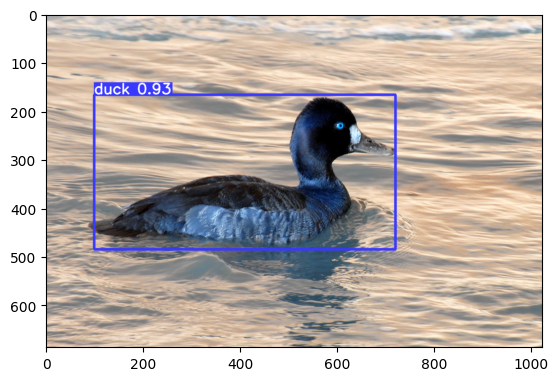

In [60]:
result_arr = result[0].plot()
plt.imshow(result_arr)

#### Duck 2

In [44]:
image = '/content/dataset/train2/images/val/0555911ee31d049f.png'
result = inference_model.predict(image)


image 1/1 /content/dataset/train2/images/val/0555911ee31d049f.png: 544x800 1 duck, 39.0ms
Speed: 11.5ms preprocess, 39.0ms inference, 2.8ms postprocess per image at shape (1, 3, 544, 800)


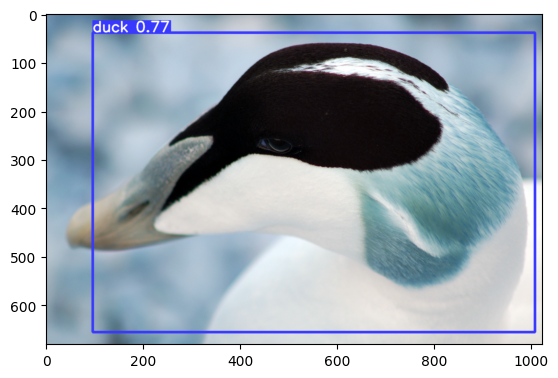

In [45]:
result_arr = result[0].plot()
plt.imshow(result_arr)

#### Duck 3

In [46]:
image = '/content/dataset/train2/images/val/11520a5f881bfead.png'
result = inference_model.predict(image)


image 1/1 /content/dataset/train2/images/val/11520a5f881bfead.png: 608x800 1 duck, 21.6ms
Speed: 5.2ms preprocess, 21.6ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)


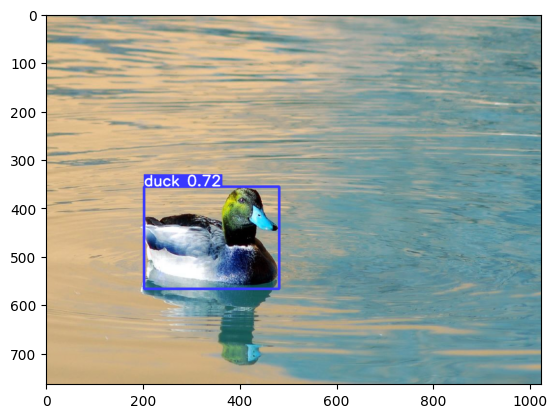

In [47]:
result_arr = result[0].plot()
plt.imshow(result_arr)

#### Duck 4

In [54]:
image = '/content/dataset/train2/images/val/144cb221958eba04.png'
result = inference_model.predict(image)


image 1/1 /content/dataset/train2/images/val/144cb221958eba04.png: 608x800 1 duck, 20.2ms
Speed: 5.0ms preprocess, 20.2ms inference, 2.1ms postprocess per image at shape (1, 3, 608, 800)


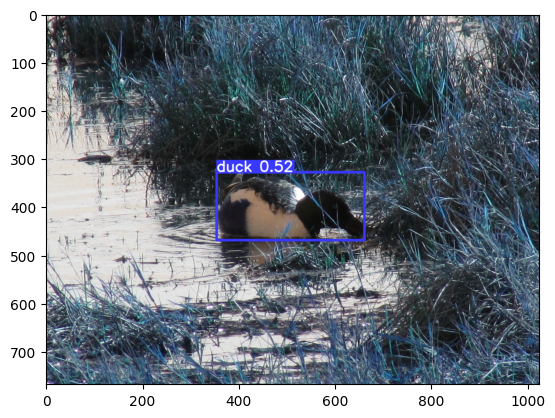

In [55]:
result_arr = result[0].plot()
plt.imshow(result_arr)

### Impact of augmentations.

### (i) Does the default run use augmentations? Which ones and what do they do?
### Hint: analyze the output train logs (watch out for albumentations, an augmentations library).

Yes default run uses augmentation .

#### hsv_h, hsv_s, hsv_v: Adjusts hue, saturation, and value of the image.
#### degrees: Rotates the image by a certain angle.
#### translate: Shifts the image horizontally and vertically.
#### scale: Scales the image.
#### shear: Shears the image.
#### perspective: Applies perspective transformation to the image.
#### flipud, fliplr: Flips the image vertically and horizontally.
#### bgr: Changes the color space of the image.
#### mosaic: Generates a mosaic effect by combining multiple images into one.
#### mixup: Blends two images together.
#### copy_paste: Copies objects from one image and pastes them onto another.
#### erasing: Erases parts of the image.
#### crop_fraction: Crops a fraction of the image.

## Without Augmentation yolov8n



In [ ]:
# albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A.Blur(p=0.01): This augmentation applies a blur effect to the image. The p parameter specifies the probability of applying this augmentation. In this case, it has a very low probability of 0.01, meaning it will be applied rarely.

A.MedianBlur(p=0.01): Similar to the blur augmentation, median blur replaces each pixel's value with the median value of its neighboring pixels. Again, the p parameter specifies the probability of applying this augmentation, which is 0.01 in this case.

A.ToGray(p=0.01): This augmentation converts the image to grayscale. The p parameter specifies the probability of applying this augmentation, which is 0.01 in this case.

A.CLAHE(p=0.01): CLAHE stands for Contrast Limited Adaptive Histogram Equalization. It enhances the image's contrast, particularly in regions with low contrast. The p parameter specifies the probability of applying this augmentation, which is 0.01 in this case.

A.RandomBrightnessContrast(p=0.0): This augmentation randomly adjusts the brightness and contrast of the image. The p parameter specifies the probability of applying this augmentation, which is 0.0 in this case, meaning it will not be applied.

A.RandomGamma(p=0.0): This augmentation applies a random gamma correction to the image, which can change the image's brightness. The p parameter specifies the probability of applying this augmentation, which is 0.0 in this case, meaning it will not be applied.

A.ImageCompression(quality_lower=75, p=0.0): This augmentation simulates image compression, which reduces the image's quality. The quality_lower parameter specifies the lower bound of the compression quality, and the p parameter specifies the probability of applying this augmentation, which is 0.0 in this case, meaning it will not be applied.

These augmentations can be used to modify the input images to improve the model's performance or robustness during training. The probabilities (p values) determine how frequently each augmentation is applied, with lower values indicating less frequent application.




Blur and MedianBlur: Increase the kernel size parameter (blur_limit for Blur and median_blur_limit for MedianBlur). Larger kernel sizes will result in more blur.

CLAHE: Increase the clip_limit parameter. Higher values of clip_limit can result in more aggressive contrast enhancement.

ToGray: This augmentation already converts images to grayscale, so there's not much you can change here to increase the change in the augmented images.

RandomBrightnessContrast: Increase the brightness_limit and contrast_limit parameters. Higher values will result in more significant changes in brightness and contrast.

RandomGamma: Increase the gamma_limit parameter. Higher values will result in more significant gamma adjustments.

ImageCompression: Increase the quality_lower and quality_upper parameters. Lower values will result in more compression and lower image quality.

In [67]:
# T = [
#                 A.Blur(p=0.01),
#                 A.MedianBlur(p=0.01),
#                 A.ToGray(p=0.01),
#                 A.CLAHE(p=0.01),
#                 A.RandomBrightnessContrast(p=0.0),
#                 A.RandomGamma(p=0.0),
#                 A.ImageCompression(quality_lower=75, p=0.0),
#             ]

With Augumentation

In [39]:
import locale
def getpreferredencoding(do_setlocale = True):
  return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

!yolo task=detect mode=train model=yolov8n.pt data=/content/dataset/train2/config.yaml epochs=5

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/train2/config.yaml epochs=5, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

In [40]:
name_9 = "pretrained_nano_train2"
# model_with_augumentation = YOLO('yolov8n.pt')
model_with_augumentation = YOLO('yolov8n.pt')
results = model_with_augumentation.train(data = data_2,
                      project=project,
                      name=name_9,
                      epochs=epochs,
                      patience=patience,
                      batch=batch,
                      imgsz=no_of_images)

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/train2/config.yaml, epochs=20, time=None, patience=100, batch=20, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/dataset/results, name=pretrained_nano_train25, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

train: Scanning /content/dataset/train2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/dataset/train2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to /content/dataset/results/pretrained_nano_train25/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/dataset/results/pretrained_nano_train25
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       4.9G      1.039      2.902      1.277         57        800: 100%|██████████| 20/20 [00:16<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         50         52     0.0034      0.981       0.37      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.84G      1.069      2.463      1.293         55        800: 100%|██████████| 20/20 [00:14<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         50         52      0.727      0.307      0.461      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.84G      1.149      2.463      1.349         45        800: 100%|██████████| 20/20 [00:14<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         50         52       0.35      0.269      0.195     0.0903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.84G      1.205      2.411      1.396         51        800: 100%|██████████| 20/20 [00:15<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         50         52      0.271      0.288      0.228       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.84G      1.259      2.356      1.425         45        800: 100%|██████████| 20/20 [00:15<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         50         52      0.209      0.385      0.173     0.0776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.84G      1.262      2.302      1.417         43        800: 100%|██████████| 20/20 [00:16<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         50         52       0.16      0.305      0.135     0.0423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.86G      1.271      2.186      1.426         52        800: 100%|██████████| 20/20 [00:15<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         50         52      0.388      0.346      0.307      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.84G      1.154      1.964      1.327         38        800: 100%|██████████| 20/20 [00:14<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         50         52       0.58      0.365        0.4      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.84G      1.145      1.855       1.36         44        800: 100%|██████████| 20/20 [00:15<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         50         52      0.418        0.5      0.386      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.84G      1.135      1.807      1.322         46        800: 100%|██████████| 20/20 [00:15<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         50         52      0.605      0.442      0.469      0.224


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.84G      1.214       2.32       1.49         21        800: 100%|██████████| 20/20 [00:19<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         50         52      0.452      0.596      0.521      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.83G      1.165      2.122      1.462         20        800: 100%|██████████| 20/20 [00:12<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         50         52      0.644      0.596      0.643      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.83G      1.075      1.974      1.389         21        800: 100%|██████████| 20/20 [00:14<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all         50         52       0.71      0.635      0.652      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.83G      1.071      1.912      1.397         24        800: 100%|██████████| 20/20 [00:14<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         50         52      0.711      0.663      0.675      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.83G      1.045      1.825      1.371         21        800: 100%|██████████| 20/20 [00:15<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         50         52      0.698      0.615      0.689      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.83G      1.011      1.784      1.342         20        800: 100%|██████████| 20/20 [00:14<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         50         52      0.674      0.808      0.739      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.83G      0.935      1.674      1.288         22        800: 100%|██████████| 20/20 [00:15<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         50         52      0.762      0.577      0.721      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.83G     0.9179       1.58      1.249         21        800: 100%|██████████| 20/20 [00:14<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         50         52        0.7       0.75      0.765      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.83G     0.8683       1.52      1.224         20        800: 100%|██████████| 20/20 [00:16<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]


                   all         50         52      0.627      0.788      0.749      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.83G      0.845      1.443      1.198         23        800: 100%|██████████| 20/20 [00:14<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         50         52      0.713      0.692       0.73      0.529



20 epochs completed in 0.101 hours.
Optimizer stripped from /content/dataset/results/pretrained_nano_train25/weights/last.pt, 6.3MB
Optimizer stripped from /content/dataset/results/pretrained_nano_train25/weights/best.pt, 6.3MB

Validating /content/dataset/results/pretrained_nano_train25/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


                   all         50         52      0.714      0.692       0.73      0.527
Speed: 0.3ms preprocess, 2.8ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to /content/dataset/results/pretrained_nano_train25



image 1/1 /content/dataset/train2/images/val/11520a5f881bfead.png: 608x800 1 duck, 11.2ms
Speed: 3.6ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 800)


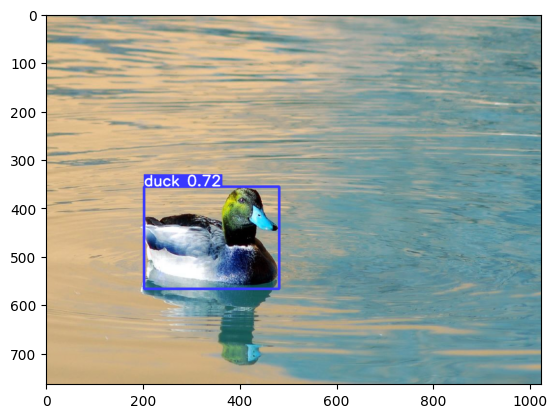

In [43]:
image = '/content/dataset/train2/images/val/11520a5f881bfead.png'
result = model_with_augumentation.predict(image)

result_arr = result[0].plot()
plt.imshow(result_arr)

# Without Augumantation

### Transforms
            T = [
                A.Blur(p=0),
                A.MedianBlur(p=0),
                A.ToGray(p=0),
                A.CLAHE(p=0),
                A.RandomBrightnessContrast(p=0.0),
                A.RandomGamma(p=0.0),
                A.ImageCompression(quality_lower=0, p=0.0),
            ]*italicised text*

In [35]:
name_9 = "pretrained_nano_train2"
# model_without_augumentation = YOLO('yolov8n.pt')
model_without_augumentation = YOLO('yolov8n.pt')
results = model_without_augumentation.train(data = data_2,
                      project=project,
                      name=name_9,
                      epochs=epochs,
                      patience=patience,
                      batch=batch,
                      imgsz=no_of_images)

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/train2/config.yaml, epochs=20, time=None, patience=100, batch=20, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/dataset/results, name=pretrained_nano_train24, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

train: Scanning /content/dataset/train2/labels/train... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:01<00:00, 203.57it/s]

train: New cache created: /content/dataset/train2/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/dataset/train2/labels/val... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 103.12it/s]

val: New cache created: /content/dataset/train2/labels/val.cache


Plotting labels to /content/dataset/results/pretrained_nano_train24/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/dataset/results/pretrained_nano_train24
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      5.39G      1.039      2.902      1.277         57        800: 100%|██████████| 20/20 [00:17<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all         50         52     0.0034      0.981       0.37      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.87G      1.069      2.463      1.293         55        800: 100%|██████████| 20/20 [00:13<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         50         52      0.727      0.307      0.461      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.87G      1.149      2.463      1.349         45        800: 100%|██████████| 20/20 [00:14<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]


                   all         50         52       0.35      0.269      0.195     0.0903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.87G      1.205      2.411      1.396         51        800: 100%|██████████| 20/20 [00:14<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         50         52      0.271      0.288      0.228       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.87G      1.259      2.356      1.425         45        800: 100%|██████████| 20/20 [00:14<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         50         52      0.209      0.385      0.173     0.0776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.87G      1.262      2.302      1.417         43        800: 100%|██████████| 20/20 [00:14<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         50         52       0.16      0.305      0.135     0.0423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20       4.9G      1.271      2.186      1.426         52        800: 100%|██████████| 20/20 [00:14<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         50         52      0.388      0.346      0.307      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.87G      1.154      1.964      1.327         38        800: 100%|██████████| 20/20 [00:14<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         50         52       0.58      0.365        0.4      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.87G      1.145      1.855       1.36         44        800: 100%|██████████| 20/20 [00:15<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         50         52      0.418        0.5      0.386      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.87G      1.135      1.807      1.322         46        800: 100%|██████████| 20/20 [00:14<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         50         52      0.605      0.442      0.469      0.224


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.87G      1.214       2.32       1.49         21        800: 100%|██████████| 20/20 [00:17<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         50         52      0.452      0.596      0.521      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.87G      1.165      2.122      1.462         20        800: 100%|██████████| 20/20 [00:13<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         50         52      0.644      0.596      0.643      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.87G      1.075      1.974      1.389         21        800: 100%|██████████| 20/20 [00:13<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         50         52       0.71      0.635      0.652      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.87G      1.071      1.912      1.397         24        800: 100%|██████████| 20/20 [00:14<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         50         52      0.711      0.663      0.675      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.87G      1.045      1.825      1.371         21        800: 100%|██████████| 20/20 [00:13<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         50         52      0.698      0.615      0.689      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.87G      1.011      1.784      1.342         20        800: 100%|██████████| 20/20 [00:14<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         50         52      0.674      0.808      0.739      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.87G      0.935      1.674      1.288         22        800: 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         50         52      0.762      0.577      0.721      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.87G     0.9179       1.58      1.249         21        800: 100%|██████████| 20/20 [00:14<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         50         52        0.7       0.75      0.765      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.87G     0.8683       1.52      1.224         20        800: 100%|██████████| 20/20 [00:14<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         50         52      0.627      0.788      0.749      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.87G      0.845      1.443      1.198         23        800: 100%|██████████| 20/20 [00:13<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         50         52      0.713      0.692       0.73      0.529



20 epochs completed in 0.095 hours.
Optimizer stripped from /content/dataset/results/pretrained_nano_train24/weights/last.pt, 6.3MB
Optimizer stripped from /content/dataset/results/pretrained_nano_train24/weights/best.pt, 6.3MB

Validating /content/dataset/results/pretrained_nano_train24/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]


                   all         50         52      0.714      0.692       0.73      0.527
Speed: 0.4ms preprocess, 4.4ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to /content/dataset/results/pretrained_nano_train24


In [37]:
image = '/content/dataset/train2/images/val/11520a5f881bfead.png'
result = model_without_augumentation.predict(image)


image 1/1 /content/dataset/train2/images/val/11520a5f881bfead.png: 608x800 1 duck, 15.7ms
Speed: 4.9ms preprocess, 15.7ms inference, 4.6ms postprocess per image at shape (1, 3, 608, 800)


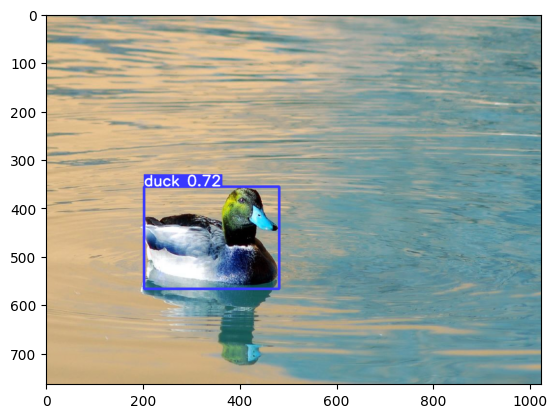

In [38]:
result_arr = result[0].plot()
plt.imshow(result_arr)

With Augumentation = 0.527

Without Augumentation = 0.526


#### Both remained almost the same

# Transforms
            T = [
                A.Blur(p=0.1),
                A.MedianBlur(p=0.1),
                A.ToGray(p=1),
                A.CLAHE(p=1),
                A.RandomBrightnessContrast(p=1),
                A.RandomGamma(p=1),
                A.ImageCompression(quality_lower=100, p=1),
            ]

In [44]:
name_9 = "pretrained_nano_train2"
# model_without_augumentation = YOLO('yolov8n.pt')
model_with_augumentation_1 = YOLO('yolov8n.pt')
results = model_with_augumentation_1.train(data = data_2,
                      project=project,
                      name=name_9,
                      epochs=epochs,
                      patience=patience,
                      batch=batch,
                      imgsz=no_of_images)

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/train2/config.yaml, epochs=20, time=None, patience=100, batch=20, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/dataset/results, name=pretrained_nano_train26, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

train: Scanning /content/dataset/train2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/dataset/train2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to /content/dataset/results/pretrained_nano_train26/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/dataset/results/pretrained_nano_train26
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.84G      1.039      2.902      1.277         57        800: 100%|██████████| 20/20 [00:17<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         50         52     0.0034      0.981       0.37      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.84G      1.069      2.463      1.293         55        800: 100%|██████████| 20/20 [00:15<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         50         52      0.727      0.307      0.461      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.84G      1.149      2.463      1.349         45        800: 100%|██████████| 20/20 [00:16<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         50         52       0.35      0.269      0.195     0.0903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.84G      1.205      2.411      1.396         51        800: 100%|██████████| 20/20 [00:15<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         50         52      0.271      0.288      0.228       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.84G      1.259      2.356      1.425         45        800: 100%|██████████| 20/20 [00:15<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         50         52      0.209      0.385      0.173     0.0776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.84G      1.262      2.302      1.417         43        800: 100%|██████████| 20/20 [00:15<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         50         52       0.16      0.305      0.135     0.0423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.87G      1.271      2.186      1.426         52        800: 100%|██████████| 20/20 [00:15<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         50         52      0.388      0.346      0.307      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.84G      1.154      1.964      1.327         38        800: 100%|██████████| 20/20 [00:16<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]


                   all         50         52       0.58      0.365        0.4      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.83G      1.145      1.855       1.36         44        800: 100%|██████████| 20/20 [00:20<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         50         52      0.418        0.5      0.386      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.83G      1.135      1.807      1.322         46        800: 100%|██████████| 20/20 [00:22<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         50         52      0.605      0.442      0.469      0.224


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.83G      1.214       2.32       1.49         21        800: 100%|██████████| 20/20 [00:21<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]


                   all         50         52      0.452      0.596      0.521      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.83G      1.165      2.122      1.462         20        800: 100%|██████████| 20/20 [00:16<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         50         52      0.644      0.596      0.643      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.83G      1.075      1.974      1.389         21        800: 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         50         52       0.71      0.635      0.652      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.83G      1.071      1.912      1.397         24        800: 100%|██████████| 20/20 [00:15<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         50         52      0.711      0.663      0.675      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.83G      1.045      1.825      1.371         21        800: 100%|██████████| 20/20 [00:16<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         50         52      0.698      0.615      0.689      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.83G      1.011      1.784      1.342         20        800: 100%|██████████| 20/20 [00:14<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         50         52      0.674      0.808      0.739      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.83G      0.935      1.674      1.288         22        800: 100%|██████████| 20/20 [00:16<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         50         52      0.762      0.577      0.721      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.83G     0.9179       1.58      1.249         21        800: 100%|██████████| 20/20 [00:14<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         50         52        0.7       0.75      0.765      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.83G     0.8683       1.52      1.224         20        800: 100%|██████████| 20/20 [00:15<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         50         52      0.627      0.788      0.749      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.83G      0.845      1.443      1.198         23        800: 100%|██████████| 20/20 [00:14<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         50         52      0.713      0.692       0.73      0.529



20 epochs completed in 0.109 hours.
Optimizer stripped from /content/dataset/results/pretrained_nano_train26/weights/last.pt, 6.3MB
Optimizer stripped from /content/dataset/results/pretrained_nano_train26/weights/best.pt, 6.3MB

Validating /content/dataset/results/pretrained_nano_train26/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]


                   all         50         52      0.714      0.692       0.73      0.527
Speed: 0.3ms preprocess, 3.1ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to /content/dataset/results/pretrained_nano_train26


In [46]:
image = '/content/dataset/train2/images/val/11520a5f881bfead.png'
result = model_with_augumentation_1.predict(image)


image 1/1 /content/dataset/train2/images/val/11520a5f881bfead.png: 608x800 1 duck, 20.0ms
Speed: 3.4ms preprocess, 20.0ms inference, 2.6ms postprocess per image at shape (1, 3, 608, 800)


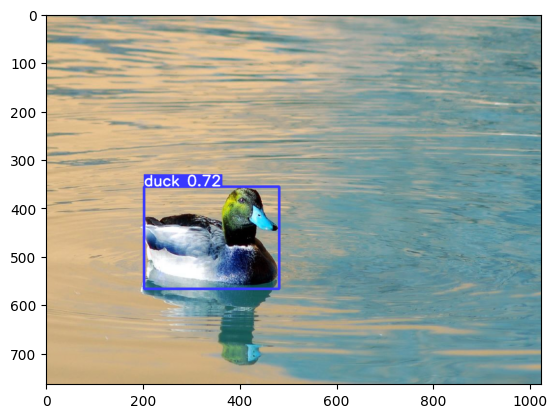

In [47]:
result_arr = result[0].plot()
plt.imshow(result_arr)

 # Transforms
            T = [
                # A.Blur(p=0.1),
                # A.MedianBlur(p=0.1),
                A.ToGray(p=1),
                A.CLAHE(p=1),
                # A.RandomBrightnessContrast(p=1),
                # A.RandomGamma(p=1),
                A.ImageCompression(quality_lower=100, p=1),
            ]

In [ ]:
name_9 = "pretrained_nano_train2"
# model_without_augumentation = YOLO('yolov8n.pt')
model_with_augumentation_commented = YOLO('yolov8n.pt')
results = model_with_augumentation_commented.train(data = data_2,
                      project=project,
                      name=name_9,
                      epochs=epochs,
                      patience=patience,
                      batch=batch,
                      imgsz=no_of_images)

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/train2/config.yaml, epochs=20, time=None, patience=100, batch=20, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/dataset/results, name=pretrained_nano_train27, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

train: Scanning /content/dataset/train2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/dataset/train2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to /content/dataset/results/pretrained_nano_train27/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/dataset/results/pretrained_nano_train27
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.91G      1.039      2.902      1.277         57        800: 100%|██████████| 20/20 [00:22<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         50         52     0.0034      0.981       0.37      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.91G      1.069      2.463      1.293         55        800: 100%|██████████| 20/20 [00:15<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         50         52      0.727      0.307      0.461      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.91G      1.149      2.463      1.349         45        800: 100%|██████████| 20/20 [00:16<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         50         52       0.35      0.269      0.195     0.0903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.92G      1.205      2.411      1.396         51        800: 100%|██████████| 20/20 [00:17<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         50         52      0.271      0.288      0.228       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.91G      1.259      2.356      1.425         45        800: 100%|██████████| 20/20 [00:16<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         50         52      0.209      0.385      0.173     0.0776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.91G      1.262      2.302      1.417         43        800: 100%|██████████| 20/20 [00:16<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         50         52       0.16      0.305      0.135     0.0423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.94G      1.271      2.186      1.426         52        800: 100%|██████████| 20/20 [00:17<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         50         52      0.388      0.346      0.307      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.91G      1.154      1.964      1.327         38        800: 100%|██████████| 20/20 [00:16<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         50         52       0.58      0.365        0.4      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.92G      1.145      1.855       1.36         44        800: 100%|██████████| 20/20 [00:16<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         50         52      0.418        0.5      0.386      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.91G      1.135      1.807      1.322         46        800: 100%|██████████| 20/20 [00:18<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         50         52      0.605      0.442      0.469      0.224


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.89G      1.214       2.32       1.49         21        800: 100%|██████████| 20/20 [00:43<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         50         52      0.452      0.596      0.521      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.88G      1.165      2.122      1.462         20        800: 100%|██████████| 20/20 [00:15<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         50         52      0.644      0.596      0.643      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.88G      1.075      1.974      1.389         21        800: 100%|██████████| 20/20 [00:15<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         50         52       0.71      0.635      0.652      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.88G      1.071      1.912      1.397         24        800: 100%|██████████| 20/20 [00:14<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         50         52      0.711      0.663      0.675      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.88G      1.045      1.825      1.371         21        800: 100%|██████████| 20/20 [00:15<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         50         52      0.698      0.615      0.689      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.88G      1.011      1.784      1.342         20        800: 100%|██████████| 20/20 [00:14<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         50         52      0.674      0.808      0.739      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.88G      0.935      1.674      1.288         22        800: 100%|██████████| 20/20 [00:16<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         50         52      0.762      0.577      0.721      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.88G     0.9179       1.58      1.249         21        800: 100%|██████████| 20/20 [00:15<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         50         52        0.7       0.75      0.765      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.88G     0.8683       1.52      1.224         20        800: 100%|██████████| 20/20 [00:15<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         50         52      0.627      0.788      0.749      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.88G      0.845      1.443      1.198         23        800: 100%|██████████| 20/20 [00:14<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         50         52      0.713      0.692       0.73      0.529



20 epochs completed in 0.114 hours.
Optimizer stripped from /content/dataset/results/pretrained_nano_train27/weights/last.pt, 6.3MB
Optimizer stripped from /content/dataset/results/pretrained_nano_train27/weights/best.pt, 6.3MB

Validating /content/dataset/results/pretrained_nano_train27/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]


In [ ]:
pd.read_csv(f'/content/dataset/results/{name_9}/results.csv')
